<a href="https://colab.research.google.com/github/renanfioramonte/end-to-end_heart_disease_classifier/blob/main/end_to_end_heart_disease_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plots inside the notebook
%matplotlib inline
import seaborn as sns

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Models evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn import metrics

# Data

In [2]:
df = pd.read_csv('../input/heart-disease-dataset/heart.csv')

# EDA

## General

In [3]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


(None,
                age          sex           cp     trestbps        chol  \
 count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
 mean     54.434146     0.695610     0.942439   131.611707   246.00000   
 std       9.072290     0.460373     1.029641    17.516718    51.59251   
 min      29.000000     0.000000     0.000000    94.000000   126.00000   
 25%      48.000000     0.000000     0.000000   120.000000   211.00000   
 50%      56.000000     1.000000     1.000000   130.000000   240.00000   
 75%      61.000000     1.000000     2.000000   140.000000   275.00000   
 max      77.000000     1.000000     3.000000   200.000000   564.00000   
 
                fbs      restecg      thalach        exang      oldpeak  \
 count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
 mean      0.149268     0.529756   149.114146     0.336585     1.071512   
 std       0.356527     0.527878    23.005724     0.472772     1.175053   
 min       0.000000     0

## Correlation Matrix

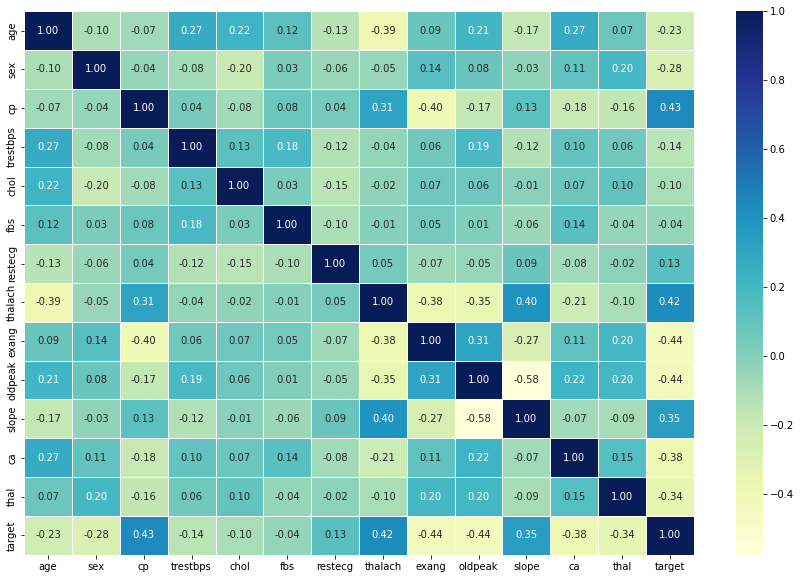

In [4]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths = 0.5, fmt='.2f', cmap='YlGnBu')

## Heart disease vs. gender

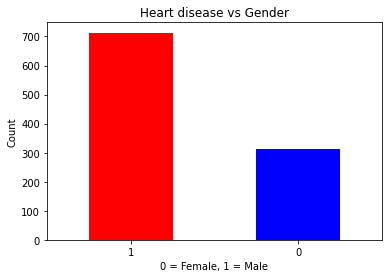

In [5]:
df.sex.value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('Heart disease vs Gender')
plt.xlabel('0 = Female, 1 = Male')
plt.ylabel('Count')
plt.xticks(rotation=0);

In [6]:
# Comparing target columns with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


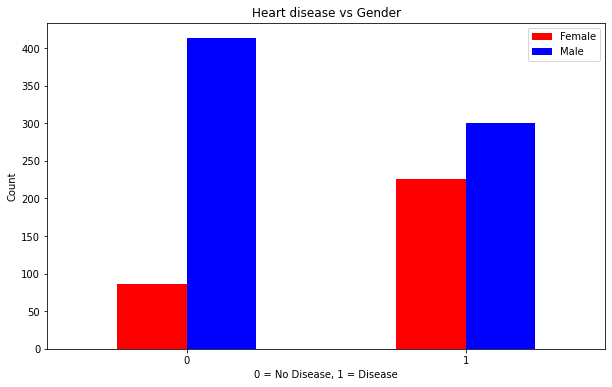

In [7]:
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10,6), color=['red', 'blue'])
plt.title('Heart disease vs Gender')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Count')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

## Age vs. Heart Rate for heart disease

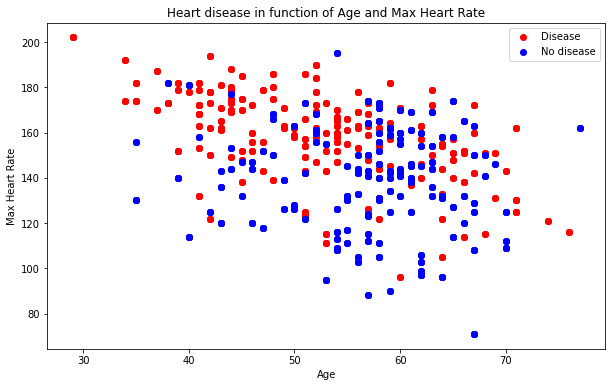

In [8]:
plt.figure(figsize=(10,6))
# scatter of patients WITH heart disease
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c='red')
# scatter of patients WITHOUT heart disease
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c='blue')

plt.title('Heart disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No disease']);

## Heart Disease vs. Chest Pain

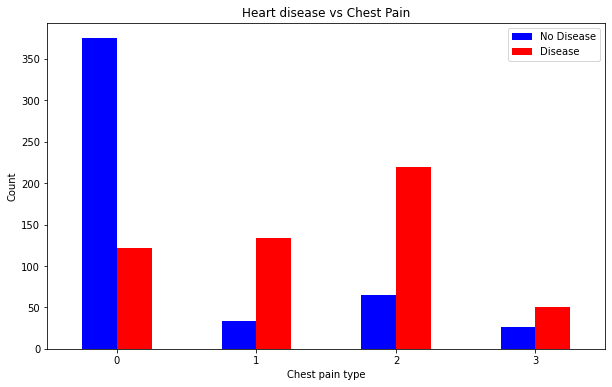

In [9]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,6), color=['blue', 'red'])
plt.title('Heart disease vs Chest Pain')
plt.xlabel('Chest pain type')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

# Modelling

## Split Data

In [10]:
X = df.drop('target', axis=1)
y = df.target

In [11]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
len(X_train), len(y_train), len(X_test), len(y_test)

(820, 820, 205, 205)

## Models

### Logistic Regression

In [13]:
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)
log_reg_score = metrics.f1_score(y_test, logistic_regression.predict(X_test))
log_reg_score

0.8108108108108107

#### Hyperparamter using RandomizedSearchCV

In [14]:
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

In [15]:
np.random.seed(42)

random_search_log_reg = RandomizedSearchCV(LogisticRegression(),
                                           param_distributions = log_reg_grid,
                                           cv = 5,
                                           n_iter=1000,
                                           verbose=True)

random_search_log_reg.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 20 is smaller than n_iter=1000. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=1000,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [16]:
random_search_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [17]:
random_search_log_reg.score(X_test, y_test)

0.7853658536585366

#### Hyperparamter using GridSearchCV

In [18]:
log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          verbose = True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [19]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [20]:
gs_log_reg.score(X_test, y_test)

0.7853658536585366

#### Model Evaluation

##### ROC

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


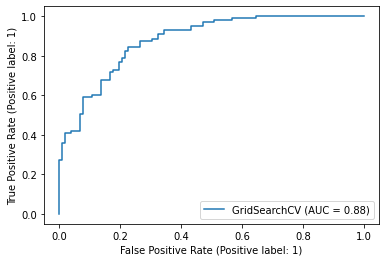

In [21]:
# Plotting ROC curve and calculate AUC
plot_roc_curve(gs_log_reg, X_test, y_test);

##### Confusion Matrix

In [22]:
y_preds = gs_log_reg.predict(X_test)

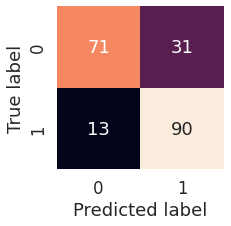

In [23]:
sns.set(font_scale=1.5)
 
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

##### Classification Report

In [24]:
# For a single test set
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



###### Using Cross-validation ( cross_val_score() )

In [25]:
#Checking best hyperparameters

gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [26]:
# Creating new classifier with the best params
clf = LogisticRegression(C = 1.3738237958832638, solver = 'liblinear')

In [27]:
# Cross-validated accuracy

cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv = 5,
                         scoring = 'accuracy')

cv_acc = np.mean(cv_acc)
cv_acc

0.8478048780487806

In [28]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv = 5,
                         scoring = 'precision')

cv_precision = np.mean(cv_precision)
cv_precision

0.8226314773669621

In [29]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv = 5,
                         scoring = 'recall')

cv_recall = np.mean(cv_recall)
cv_recall

0.8974303683737646

In [30]:
# Cross-validated F1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv = 5,
                         scoring = 'f1')

cv_f1 = np.mean(cv_f1)
cv_f1

0.8583430306540801

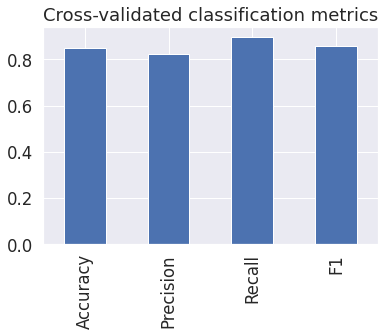

In [31]:
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1': cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title= 'Cross-validated classification metrics', legend = False);

##### Feature Importance

In [32]:
# Using the LogisticRegression instance that was created in the previous section

clf.fit(X_train, y_train)

LogisticRegression(C=1.3738237958832638, solver='liblinear')

In [33]:
# Checking the coef_
clf.coef_
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

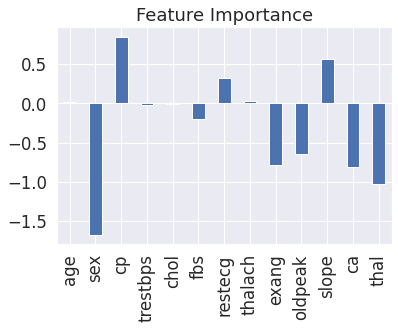

In [34]:
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = 'Feature Importance', legend = False);

### K-Nearest Neighbours Classifier


In [35]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_score = metrics.f1_score(y_test, knn.predict(X_test))
knn_score

0.7342995169082126

#### KNN tunning

In [36]:
train_scores = []
test_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
  knn.set_params(algorithm='auto', leaf_size=45, p=1, n_neighbors=i)
  knn.fit(X_train, y_train)
  train_scores.append(knn.score(X_train, y_train))
  test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 98.54%


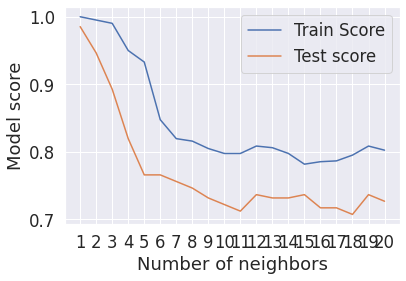

In [37]:
plt.plot(neighbors, train_scores, label = 'Train Score')
plt.plot(neighbors, test_scores, label = 'Test score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')


#### Model Evaluation

##### ROC

In [38]:
knn_best_param = knn.set_params(algorithm='auto', leaf_size=45, p=1, n_neighbors=5)
knn_best_param.fit(X_test, y_test)
knn_best_param.score(X_train, y_train)

0.7048780487804878

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


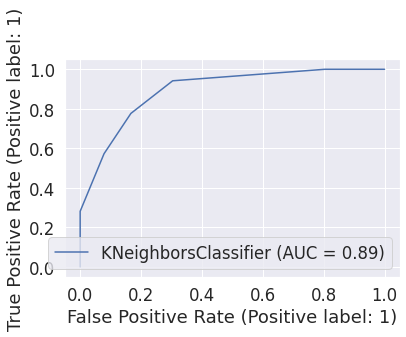

In [39]:
# Plotting ROC curve and calculate AUC
plot_roc_curve(knn_best_param, X_test, y_test);

##### Confusion Matrix

In [40]:
y_preds = knn_best_param.predict(X_test)

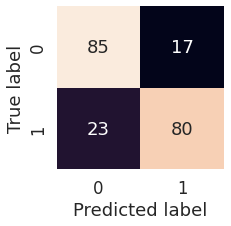

In [41]:
sns.set(font_scale=1.5)
 
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

##### Classification Report

In [42]:
# For a single test set
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       102
           1       0.82      0.78      0.80       103

    accuracy                           0.80       205
   macro avg       0.81      0.81      0.80       205
weighted avg       0.81      0.80      0.80       205



###### Using Cross-validation ( cross_val_score() )

In [43]:
# Cross-validated accuracy

cv_acc = cross_val_score(knn_best_param,
                         X,
                         y,
                         cv = 5,
                         scoring = 'accuracy')

cv_acc = np.mean(cv_acc)
cv_acc

0.7746341463414634

In [44]:
# Cross-validated precision
cv_precision = cross_val_score(knn_best_param,
                         X,
                         y,
                         cv = 5,
                         scoring = 'precision')

cv_precision = np.mean(cv_precision)
cv_precision

0.7979260871738356

In [45]:
# Cross-validated recall
cv_recall = cross_val_score(knn_best_param,
                         X,
                         y,
                         cv = 5,
                         scoring = 'recall')

cv_recall = np.mean(cv_recall)
cv_recall

0.7547529200359389

In [46]:
# Cross-validated F1-score
cv_f1 = cross_val_score(knn_best_param,
                         X,
                         y,
                         cv = 5,
                         scoring = 'f1')

cv_f1 = np.mean(cv_f1)
cv_f1

0.7747553112275909

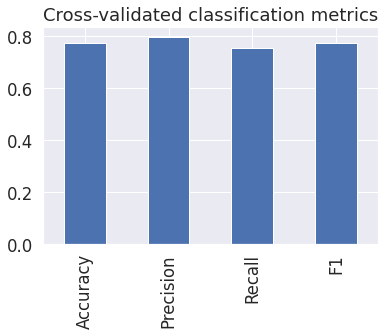

In [47]:
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1': cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title= 'Cross-validated classification metrics', legend = False);

### Random Forest Classifier

##### Hyperparamter using RandomizedSearchCV

In [48]:
rand_for_grid = {'n_estimators': np.arange(10, 1000, 50),
               'max_depth': [None, 3, 5, 10],
               'min_samples_split': np.arange(2, 20, 2),
               'min_samples_leaf': np.arange(1, 20, 2)}

In [49]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
rand_for_score = metrics.f1_score(y_test, random_forest.predict(X_test))
rand_for_score

0.9852216748768473

In [50]:

np.random.seed(42)

random_search_rand_for = RandomizedSearchCV(RandomForestClassifier(),
                                            param_distributions = rand_for_grid,
                                            cv= 5,
                                            n_iter = 20,
                                            verbose = True)
random_search_rand_for.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [51]:
random_search_rand_for.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [52]:
random_search_rand_for.score(X_test, y_test)

0.926829268292683

#### Model Evaluation

##### ROC

In [53]:
rand_for_best_param = random_forest.set_params(n_estimators = 510, min_samples_split = 14, min_samples_leaf = 1, max_depth= None)
rand_for_best_param.fit(X_test, y_test)
rand_for_best_param.score(X_train, y_train)

0.8585365853658536

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


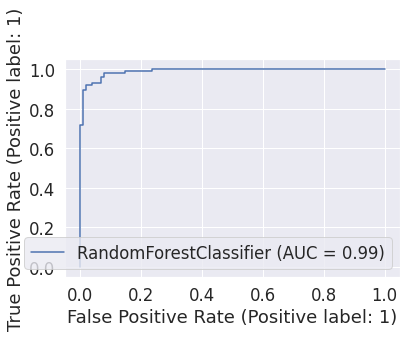

In [54]:
# Plotting ROC curve and calculate AUC
plot_roc_curve(rand_for_best_param, X_test, y_test);

##### Confusion Matrix

In [55]:
y_preds = rand_for_best_param.predict(X_test)

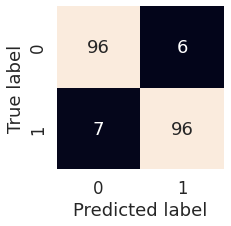

In [56]:
sns.set(font_scale=1.5)
 
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

##### Classification Report

In [57]:
# For a single test set
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       102
           1       0.94      0.93      0.94       103

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



###### Using Cross-validation ( cross_val_score() )

In [58]:
# Cross-validated accuracy

cv_acc = cross_val_score(rand_for_best_param,
                         X,
                         y,
                         cv = 5,
                         scoring = 'accuracy')

cv_acc = np.mean(cv_acc)
cv_acc

0.9707317073170731

In [59]:
# Cross-validated precision
cv_precision = cross_val_score(rand_for_best_param,
                         X,
                         y,
                         cv = 5,
                         scoring = 'precision')

cv_precision = np.mean(cv_precision)
cv_precision

0.9680289862374151

In [60]:
# Cross-validated recall
cv_recall = cross_val_score(rand_for_best_param,
                         X,
                         y,
                         cv = 5,
                         scoring = 'recall')

cv_recall = np.mean(cv_recall)
cv_recall

0.9791374663072776

In [61]:
# Cross-validated F1-score
cv_f1 = cross_val_score(rand_for_best_param,
                         X,
                         y,
                         cv = 5,
                         scoring = 'f1')

cv_f1 = np.mean(cv_f1)
cv_f1

0.9717421510193234

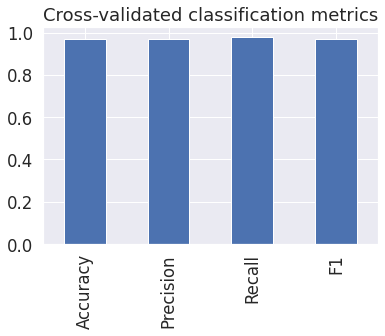

In [62]:
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1': cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title= 'Cross-validated classification metrics', legend = False);